# Statistical Power

## Introduction


We've started to investigate hypothesis testing, p-values and their use for accepting or rejecting the null hypothesis. Building upon this, we can develop a concept of the power of a statistical test, as the test's ability to detect a difference, when one exists. In the case of our coin flipping example, the power of our statistical test would be the probability of rejecting the null hypothesis "this coin is fair" when the coin was unfair. As you might assume, the power of this statistical test would thus depend on several factors including our p-value threshold for rejecting the null hypothesis, the size of our sample and the 'level of unfairness' of the coin in question.

## Objectives

You will be able to:

* Describe the concept of “Power” in relation to p-value and effect size for hypothesis testing
* Understand and critically evaluate the factors influencing the power of an experiment
* Perform Power calculation using SciPy and Python
* Demonstrate the impact of sample size on statistical power using simulations
* Demonstrate the combined effect of sample size and effect size on statistical power using simulations  

## The Power of a Statistical Test

The power of a statistical test is defined as the probability of rejecting the null hypothesis, given that it is indeed false. As with any probability, the power of a statistical test therefore ranges from 0 to 1, with 1 being a perfect test that gaurantees rejecting the null hypothesis when it is indeed false.

With that, let's recreate our previous coin flip simulation, and use it to plot some relationships between power, sample size, and our p-value cutoff.

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')
%matplotlib inline

1 0.5 1.0 1.0 0.8413447460685429 False
1 0.5 1.0 1.0 0.8413447460685429 False
0 0.5 -1.0 1.0 0.8413447460685429 False
1 0.5 1.0 1.0 0.8413447460685429 False
1 0.5 1.0 1.0 0.8413447460685429 False
0 0.5 -1.0 1.0 0.8413447460685429 False
1 0.5 1.0 1.0 0.8413447460685429 False
1 0.5 1.0 1.0 0.8413447460685429 False
0 0.5 -1.0 1.0 0.8413447460685429 False
0 0.5 -1.0 1.0 0.8413447460685429 False
1 0.5 1.0 1.0 0.8413447460685429 False
0 0.5 -1.0 1.0 0.8413447460685429 False
1 0.5 1.0 1.0 0.8413447460685429 False
1 0.5 1.0 1.0 0.8413447460685429 False
1 0.5 1.0 1.0 0.8413447460685429 False
1 0.5 1.0 1.0 0.8413447460685429 False
1 0.5 1.0 1.0 0.8413447460685429 False
1 0.5 1.0 1.0 0.8413447460685429 False
1 0.5 1.0 1.0 0.8413447460685429 False
1 0.5 1.0 1.0 0.8413447460685429 False
1 0.5 1.0 1.0 0.8413447460685429 False
0 0.5 -1.0 1.0 0.8413447460685429 False
0 0.5 -1.0 1.0 0.8413447460685429 False
1 0.5 1.0 1.0 0.8413447460685429 False
1 0.5 1.0 1.0 0.8413447460685429 False
1 0.5 1.0 1.0 0.84

1 1.0 0.0 0.0 0.5 False
1 1.0 0.0 0.0 0.5 False
1 1.0 0.0 0.0 0.5 False
0 1.0 -2.0 2.0 0.9772498680518208 True
0 1.0 -2.0 2.0 0.9772498680518208 True
2 1.0 2.0 2.0 0.9772498680518208 True
2 1.0 2.0 2.0 0.9772498680518208 True
2 1.0 2.0 2.0 0.9772498680518208 True
1 1.0 0.0 0.0 0.5 False
2 1.0 2.0 2.0 0.9772498680518208 True
2 1.0 2.0 2.0 0.9772498680518208 True
2 1.0 2.0 2.0 0.9772498680518208 True
1 1.0 0.0 0.0 0.5 False
2 1.0 2.0 2.0 0.9772498680518208 True
2 1.0 2.0 2.0 0.9772498680518208 True
2 1.0 2.0 2.0 0.9772498680518208 True
1 1.0 0.0 0.0 0.5 False
0 1.0 -2.0 2.0 0.9772498680518208 True
1 1.0 0.0 0.0 0.5 False
1 1.0 0.0 0.0 0.5 False
2 1.0 2.0 2.0 0.9772498680518208 True
3 1.5 3.0 3.0 0.9986501019683699 True
2 1.5 1.0 1.0 0.8413447460685429 False
3 1.5 3.0 3.0 0.9986501019683699 True
2 1.5 1.0 1.0 0.8413447460685429 False
2 1.5 1.0 1.0 0.8413447460685429 False
3 1.5 3.0 3.0 0.9986501019683699 True
2 1.5 1.0 1.0 0.8413447460685429 False
2 1.5 1.0 1.0 0.8413447460685429 False
3 

2 2.0 0.0 0.0 0.5 False
4 2.0 4.0 4.0 0.9999683287581669 True
2 2.0 0.0 0.0 0.5 False
4 2.0 4.0 4.0 0.9999683287581669 True
2 2.0 0.0 0.0 0.5 False
2 2.0 0.0 0.0 0.5 False
3 2.0 2.0 2.0 0.9772498680518208 True
2 2.0 0.0 0.0 0.5 False
4 2.0 4.0 4.0 0.9999683287581669 True
2 2.0 0.0 0.0 0.5 False
2 2.0 0.0 0.0 0.5 False
3 2.0 2.0 2.0 0.9772498680518208 True
3 2.0 2.0 2.0 0.9772498680518208 True
3 2.0 2.0 2.0 0.9772498680518208 True
2 2.0 0.0 0.0 0.5 False
3 2.0 2.0 2.0 0.9772498680518208 True
3 2.0 2.0 2.0 0.9772498680518208 True
3 2.0 2.0 2.0 0.9772498680518208 True
4 2.0 4.0 4.0 0.9999683287581669 True
4 2.0 4.0 4.0 0.9999683287581669 True
3 2.0 2.0 2.0 0.9772498680518208 True
4 2.0 4.0 4.0 0.9999683287581669 True
4 2.0 4.0 4.0 0.9999683287581669 True
3 2.0 2.0 2.0 0.9772498680518208 True
1 2.0 -2.0 2.0 0.9772498680518208 True
3 2.0 2.0 2.0 0.9772498680518208 True
4 2.0 4.0 4.0 0.9999683287581669 True
3 2.0 2.0 2.0 0.9772498680518208 True
3 2.0 2.0 2.0 0.9772498680518208 True
3 2.0 2.0

3 3.0 0.0 0.0 0.5 False
3 3.0 0.0 0.0 0.5 False
3 3.0 0.0 0.0 0.5 False
5 3.0 4.0 4.0 0.9999683287581669 True
5 3.0 4.0 4.0 0.9999683287581669 True
4 3.0 2.0 2.0 0.9772498680518208 True
5 3.0 4.0 4.0 0.9999683287581669 True
5 3.0 4.0 4.0 0.9999683287581669 True
2 3.0 -2.0 2.0 0.9772498680518208 True
5 3.0 4.0 4.0 0.9999683287581669 True
6 3.0 6.0 6.0 0.9999999990134123 True
3 3.0 0.0 0.0 0.5 False
5 3.0 4.0 4.0 0.9999683287581669 True
6 3.0 6.0 6.0 0.9999999990134123 True
5 3.0 4.0 4.0 0.9999683287581669 True
5 3.0 4.0 4.0 0.9999683287581669 True
4 3.0 2.0 2.0 0.9772498680518208 True
5 3.0 4.0 4.0 0.9999683287581669 True
3 3.0 0.0 0.0 0.5 False
4 3.0 2.0 2.0 0.9772498680518208 True
5 3.0 4.0 4.0 0.9999683287581669 True
6 3.0 6.0 6.0 0.9999999990134123 True
4 3.0 2.0 2.0 0.9772498680518208 True
5 3.0 4.0 4.0 0.9999683287581669 True
5 3.0 4.0 4.0 0.9999683287581669 True
5 3.0 4.0 4.0 0.9999683287581669 True
6 3.0 6.0 6.0 0.9999999990134123 True
5 3.0 4.0 4.0 0.9999683287581669 True
4 3.0

5 4.0 2.0 2.0 0.9772498680518208 True
7 4.0 6.0 6.0 0.9999999990134123 True
6 4.0 4.0 4.0 0.9999683287581669 True
8 4.0 8.0 8.0 0.9999999999999993 True
5 4.0 2.0 2.0 0.9772498680518208 True
5 4.0 2.0 2.0 0.9772498680518208 True
7 4.0 6.0 6.0 0.9999999990134123 True
6 4.0 4.0 4.0 0.9999683287581669 True
6 4.0 4.0 4.0 0.9999683287581669 True
6 4.0 4.0 4.0 0.9999683287581669 True
8 4.0 8.0 8.0 0.9999999999999993 True
6 4.0 4.0 4.0 0.9999683287581669 True
5 4.0 2.0 2.0 0.9772498680518208 True
7 4.0 6.0 6.0 0.9999999990134123 True
4 4.0 0.0 0.0 0.5 False
6 4.0 4.0 4.0 0.9999683287581669 True
7 4.0 6.0 6.0 0.9999999990134123 True
8 4.0 8.0 8.0 0.9999999999999993 True
8 4.0 8.0 8.0 0.9999999999999993 True
7 4.0 6.0 6.0 0.9999999990134123 True
4 4.0 0.0 0.0 0.5 False
5 4.0 2.0 2.0 0.9772498680518208 True
5 4.0 2.0 2.0 0.9772498680518208 True
8 4.0 8.0 8.0 0.9999999999999993 True
6 4.0 4.0 4.0 0.9999683287581669 True
5 4.0 2.0 2.0 0.9772498680518208 True
6 4.0 4.0 4.0 0.9999683287581669 True
8 

7 4.5 5.0 5.0 0.9999997133484281 True
7 4.5 5.0 5.0 0.9999997133484281 True
7 4.5 5.0 5.0 0.9999997133484281 True
8 4.5 7.0 7.0 0.9999999999987201 True
7 4.5 5.0 5.0 0.9999997133484281 True
7 4.5 5.0 5.0 0.9999997133484281 True
8 4.5 7.0 7.0 0.9999999999987201 True
6 4.5 3.0 3.0 0.9986501019683699 True
7 4.5 5.0 5.0 0.9999997133484281 True
6 4.5 3.0 3.0 0.9986501019683699 True
6 4.5 3.0 3.0 0.9986501019683699 True
7 4.5 5.0 5.0 0.9999997133484281 True
7 4.5 5.0 5.0 0.9999997133484281 True
9 4.5 9.0 9.0 1.0 True
6 4.5 3.0 3.0 0.9986501019683699 True
7 4.5 5.0 5.0 0.9999997133484281 True
6 4.5 3.0 3.0 0.9986501019683699 True
8 4.5 7.0 7.0 0.9999999999987201 True
7 4.5 5.0 5.0 0.9999997133484281 True
8 4.5 7.0 7.0 0.9999999999987201 True
9 4.5 9.0 9.0 1.0 True
6 4.5 3.0 3.0 0.9986501019683699 True
7 4.5 5.0 5.0 0.9999997133484281 True
9 4.5 9.0 9.0 1.0 True
6 4.5 3.0 3.0 0.9986501019683699 True
6 4.5 3.0 3.0 0.9986501019683699 True
8 5.0 6.0 6.0 0.9999999990134123 True
5 5.0 0.0 0.0 0.5 F

8 5.5 5.0 5.0 0.9999997133484281 True
6 5.5 1.0 1.0 0.8413447460685429 False
10 5.5 9.0 9.0 1.0 True
11 5.5 11.0 11.0 1.0 True
10 5.5 9.0 9.0 1.0 True
4 5.5 -3.0 3.0 0.9986501019683699 True
10 5.5 9.0 9.0 1.0 True
9 5.5 7.0 7.0 0.9999999999987201 True
7 5.5 3.0 3.0 0.9986501019683699 True
7 5.5 3.0 3.0 0.9986501019683699 True
8 5.5 5.0 5.0 0.9999997133484281 True
9 5.5 7.0 7.0 0.9999999999987201 True
7 5.5 3.0 3.0 0.9986501019683699 True
8 5.5 5.0 5.0 0.9999997133484281 True
7 5.5 3.0 3.0 0.9986501019683699 True
11 5.5 11.0 11.0 1.0 True
7 5.5 3.0 3.0 0.9986501019683699 True
8 5.5 5.0 5.0 0.9999997133484281 True
8 5.5 5.0 5.0 0.9999997133484281 True
9 5.5 7.0 7.0 0.9999999999987201 True
8 5.5 5.0 5.0 0.9999997133484281 True
9 5.5 7.0 7.0 0.9999999999987201 True
7 5.5 3.0 3.0 0.9986501019683699 True
9 5.5 7.0 7.0 0.9999999999987201 True
8 5.5 5.0 5.0 0.9999997133484281 True
9 5.5 7.0 7.0 0.9999999999987201 True
9 5.5 7.0 7.0 0.9999999999987201 True
8 5.5 5.0 5.0 0.9999997133484281 True


9 6.0 6.0 6.0 0.9999999990134123 True
11 6.0 10.0 10.0 1.0 True
11 6.0 10.0 10.0 1.0 True
9 6.0 6.0 6.0 0.9999999990134123 True
10 6.0 8.0 8.0 0.9999999999999993 True
11 6.0 10.0 10.0 1.0 True
10 6.5 7.0 7.0 0.9999999999987201 True
7 6.5 1.0 1.0 0.8413447460685429 False
10 6.5 7.0 7.0 0.9999999999987201 True
11 6.5 9.0 9.0 1.0 True
9 6.5 5.0 5.0 0.9999997133484281 True
6 6.5 -1.0 1.0 0.8413447460685429 False
7 6.5 1.0 1.0 0.8413447460685429 False
10 6.5 7.0 7.0 0.9999999999987201 True
10 6.5 7.0 7.0 0.9999999999987201 True
10 6.5 7.0 7.0 0.9999999999987201 True
11 6.5 9.0 9.0 1.0 True
9 6.5 5.0 5.0 0.9999997133484281 True
9 6.5 5.0 5.0 0.9999997133484281 True
11 6.5 9.0 9.0 1.0 True
10 6.5 7.0 7.0 0.9999999999987201 True
8 6.5 3.0 3.0 0.9986501019683699 True
11 6.5 9.0 9.0 1.0 True
9 6.5 5.0 5.0 0.9999997133484281 True
9 6.5 5.0 5.0 0.9999997133484281 True
11 6.5 9.0 9.0 1.0 True
11 6.5 9.0 9.0 1.0 True
10 6.5 7.0 7.0 0.9999999999987201 True
10 6.5 7.0 7.0 0.9999999999987201 True
10 6.

13 7.0 12.0 12.0 1.0 True
10 7.0 6.0 6.0 0.9999999990134123 True
11 7.0 8.0 8.0 0.9999999999999993 True
10 7.0 6.0 6.0 0.9999999990134123 True
10 7.0 6.0 6.0 0.9999999990134123 True
10 7.0 6.0 6.0 0.9999999990134123 True
11 7.0 8.0 8.0 0.9999999999999993 True
10 7.0 6.0 6.0 0.9999999990134123 True
11 7.0 8.0 8.0 0.9999999999999993 True
9 7.0 4.0 4.0 0.9999683287581669 True
9 7.0 4.0 4.0 0.9999683287581669 True
12 7.0 10.0 10.0 1.0 True
11 7.0 8.0 8.0 0.9999999999999993 True
12 7.0 10.0 10.0 1.0 True
11 7.0 8.0 8.0 0.9999999999999993 True
10 7.0 6.0 6.0 0.9999999990134123 True
11 7.0 8.0 8.0 0.9999999999999993 True
9 7.0 4.0 4.0 0.9999683287581669 True
11 7.0 8.0 8.0 0.9999999999999993 True
12 7.0 10.0 10.0 1.0 True
10 7.0 6.0 6.0 0.9999999990134123 True
11 7.0 8.0 8.0 0.9999999999999993 True
9 7.0 4.0 4.0 0.9999683287581669 True
12 7.0 10.0 10.0 1.0 True
14 7.0 14.0 14.0 1.0 True
10 7.0 6.0 6.0 0.9999999990134123 True
12 7.0 10.0 10.0 1.0 True
12 7.0 10.0 10.0 1.0 True
7 7.0 0.0 0.0 0.

13 8.0 10.0 10.0 1.0 True
15 8.0 14.0 14.0 1.0 True
13 8.0 10.0 10.0 1.0 True
13 8.0 10.0 10.0 1.0 True
11 8.0 6.0 6.0 0.9999999990134123 True
13 8.0 10.0 10.0 1.0 True
11 8.0 6.0 6.0 0.9999999990134123 True
11 8.0 6.0 6.0 0.9999999990134123 True
12 8.0 8.0 8.0 0.9999999999999993 True
11 8.0 6.0 6.0 0.9999999990134123 True
11 8.0 6.0 6.0 0.9999999990134123 True
12 8.0 8.0 8.0 0.9999999999999993 True
14 8.0 12.0 12.0 1.0 True
11 8.0 6.0 6.0 0.9999999990134123 True
11 8.0 6.0 6.0 0.9999999990134123 True
12 8.0 8.0 8.0 0.9999999999999993 True
12 8.0 8.0 8.0 0.9999999999999993 True
13 8.0 10.0 10.0 1.0 True
11 8.0 6.0 6.0 0.9999999990134123 True
11 8.0 6.0 6.0 0.9999999990134123 True
12 8.0 8.0 8.0 0.9999999999999993 True
15 8.0 14.0 14.0 1.0 True
13 8.0 10.0 10.0 1.0 True
14 8.0 12.0 12.0 1.0 True
10 8.0 4.0 4.0 0.9999683287581669 True
13 8.0 10.0 10.0 1.0 True
13 8.0 10.0 10.0 1.0 True
10 8.0 4.0 4.0 0.9999683287581669 True
11 8.0 6.0 6.0 0.9999999990134123 True
14 8.0 12.0 12.0 1.0 True

14 9.0 10.0 10.0 1.0 True
10 9.0 2.0 2.0 0.9772498680518208 True
11 9.0 4.0 4.0 0.9999683287581669 True
15 9.0 12.0 12.0 1.0 True
17 9.0 16.0 16.0 1.0 True
11 9.0 4.0 4.0 0.9999683287581669 True
16 9.0 14.0 14.0 1.0 True
16 9.0 14.0 14.0 1.0 True
16 9.0 14.0 14.0 1.0 True
12 9.0 6.0 6.0 0.9999999990134123 True
15 9.0 12.0 12.0 1.0 True
11 9.0 4.0 4.0 0.9999683287581669 True
14 9.0 10.0 10.0 1.0 True
14 9.0 10.0 10.0 1.0 True
12 9.0 6.0 6.0 0.9999999990134123 True
12 9.0 6.0 6.0 0.9999999990134123 True
17 9.0 16.0 16.0 1.0 True
12 9.0 6.0 6.0 0.9999999990134123 True
14 9.0 10.0 10.0 1.0 True
12 9.0 6.0 6.0 0.9999999990134123 True
12 9.0 6.0 6.0 0.9999999990134123 True
14 9.0 10.0 10.0 1.0 True
14 9.0 10.0 10.0 1.0 True
10 9.0 2.0 2.0 0.9772498680518208 True
16 9.0 14.0 14.0 1.0 True
14 9.0 10.0 10.0 1.0 True
13 9.0 8.0 8.0 0.9999999999999993 True
15 9.0 12.0 12.0 1.0 True
12 9.0 6.0 6.0 0.9999999990134123 True
13 9.0 8.0 8.0 0.9999999999999993 True
13 9.0 8.0 8.0 0.9999999999999993 True

13 9.5 7.0 7.0 0.9999999999987201 True
16 10.0 12.0 12.0 1.0 True
16 10.0 12.0 12.0 1.0 True
13 10.0 6.0 6.0 0.9999999990134123 True
12 10.0 4.0 4.0 0.9999683287581669 True
16 10.0 12.0 12.0 1.0 True
16 10.0 12.0 12.0 1.0 True
16 10.0 12.0 12.0 1.0 True
15 10.0 10.0 10.0 1.0 True
15 10.0 10.0 10.0 1.0 True
15 10.0 10.0 10.0 1.0 True
17 10.0 14.0 14.0 1.0 True
13 10.0 6.0 6.0 0.9999999990134123 True
15 10.0 10.0 10.0 1.0 True
16 10.0 12.0 12.0 1.0 True
14 10.0 8.0 8.0 0.9999999999999993 True
15 10.0 10.0 10.0 1.0 True
17 10.0 14.0 14.0 1.0 True
17 10.0 14.0 14.0 1.0 True
11 10.0 2.0 2.0 0.9772498680518208 True
14 10.0 8.0 8.0 0.9999999999999993 True
19 10.0 18.0 18.0 1.0 True
12 10.0 4.0 4.0 0.9999683287581669 True
15 10.0 10.0 10.0 1.0 True
19 10.0 18.0 18.0 1.0 True
16 10.0 12.0 12.0 1.0 True
16 10.0 12.0 12.0 1.0 True
16 10.0 12.0 12.0 1.0 True
9 10.0 -2.0 2.0 0.9772498680518208 True
18 10.0 16.0 16.0 1.0 True
12 10.0 4.0 4.0 0.9999683287581669 True
13 10.0 6.0 6.0 0.9999999990134123

18 10.5 15.0 15.0 1.0 True
19 10.5 17.0 17.0 1.0 True
13 10.5 5.0 5.0 0.9999997133484281 True
16 10.5 11.0 11.0 1.0 True
15 10.5 9.0 9.0 1.0 True
15 10.5 9.0 9.0 1.0 True
11 10.5 1.0 1.0 0.8413447460685429 False
16 10.5 11.0 11.0 1.0 True
14 10.5 7.0 7.0 0.9999999999987201 True
20 10.5 19.0 19.0 1.0 True
18 10.5 15.0 15.0 1.0 True
15 10.5 9.0 9.0 1.0 True
17 10.5 13.0 13.0 1.0 True
15 10.5 9.0 9.0 1.0 True
12 10.5 3.0 3.0 0.9986501019683699 True
17 10.5 13.0 13.0 1.0 True
16 10.5 11.0 11.0 1.0 True
14 10.5 7.0 7.0 0.9999999999987201 True
16 10.5 11.0 11.0 1.0 True
16 10.5 11.0 11.0 1.0 True
15 10.5 9.0 9.0 1.0 True
19 10.5 17.0 17.0 1.0 True
13 10.5 5.0 5.0 0.9999997133484281 True
15 10.5 9.0 9.0 1.0 True
10 10.5 -1.0 1.0 0.8413447460685429 False
15 10.5 9.0 9.0 1.0 True
16 10.5 11.0 11.0 1.0 True
16 10.5 11.0 11.0 1.0 True
15 10.5 9.0 9.0 1.0 True
15 10.5 9.0 9.0 1.0 True
14 10.5 7.0 7.0 0.9999999999987201 True
14 10.5 7.0 7.0 0.9999999999987201 True
13 10.5 5.0 5.0 0.9999997133484281

16 11.5 9.0 9.0 1.0 True
17 11.5 11.0 11.0 1.0 True
17 11.5 11.0 11.0 1.0 True
14 11.5 5.0 5.0 0.9999997133484281 True
19 11.5 15.0 15.0 1.0 True
18 11.5 13.0 13.0 1.0 True
18 11.5 13.0 13.0 1.0 True
17 11.5 11.0 11.0 1.0 True
14 11.5 5.0 5.0 0.9999997133484281 True
19 11.5 15.0 15.0 1.0 True
18 11.5 13.0 13.0 1.0 True
18 11.5 13.0 13.0 1.0 True
17 11.5 11.0 11.0 1.0 True
20 11.5 17.0 17.0 1.0 True
18 11.5 13.0 13.0 1.0 True
18 11.5 13.0 13.0 1.0 True
17 11.5 11.0 11.0 1.0 True
18 11.5 13.0 13.0 1.0 True
16 11.5 9.0 9.0 1.0 True
13 11.5 3.0 3.0 0.9986501019683699 True
16 11.5 9.0 9.0 1.0 True
13 11.5 3.0 3.0 0.9986501019683699 True
21 11.5 19.0 19.0 1.0 True
18 11.5 13.0 13.0 1.0 True
19 11.5 15.0 15.0 1.0 True
18 11.5 13.0 13.0 1.0 True
19 11.5 15.0 15.0 1.0 True
20 11.5 17.0 17.0 1.0 True
20 11.5 17.0 17.0 1.0 True
19 11.5 15.0 15.0 1.0 True
13 11.5 3.0 3.0 0.9986501019683699 True
13 11.5 3.0 3.0 0.9986501019683699 True
15 11.5 7.0 7.0 0.9999999999987201 True
19 11.5 15.0 15.0 1.0 Tr

21 12.5 17.0 17.0 1.0 True
15 12.5 5.0 5.0 0.9999997133484281 True
18 12.5 11.0 11.0 1.0 True
18 12.5 11.0 11.0 1.0 True
16 12.5 7.0 7.0 0.9999999999987201 True
17 12.5 9.0 9.0 1.0 True
18 12.5 11.0 11.0 1.0 True
19 12.5 13.0 13.0 1.0 True
18 12.5 11.0 11.0 1.0 True
18 12.5 11.0 11.0 1.0 True
15 12.5 5.0 5.0 0.9999997133484281 True
21 12.5 17.0 17.0 1.0 True
20 12.5 15.0 15.0 1.0 True
18 12.5 11.0 11.0 1.0 True
18 12.5 11.0 11.0 1.0 True
18 12.5 11.0 11.0 1.0 True
18 12.5 11.0 11.0 1.0 True
17 12.5 9.0 9.0 1.0 True
22 12.5 19.0 19.0 1.0 True
20 12.5 15.0 15.0 1.0 True
15 12.5 5.0 5.0 0.9999997133484281 True
13 12.5 1.0 1.0 0.8413447460685429 False
19 12.5 13.0 13.0 1.0 True
19 12.5 13.0 13.0 1.0 True
21 12.5 17.0 17.0 1.0 True
20 12.5 15.0 15.0 1.0 True
20 12.5 15.0 15.0 1.0 True
18 12.5 11.0 11.0 1.0 True
18 12.5 11.0 11.0 1.0 True
18 12.5 11.0 11.0 1.0 True
18 12.5 11.0 11.0 1.0 True
17 12.5 9.0 9.0 1.0 True
17 12.5 9.0 9.0 1.0 True
20 12.5 15.0 15.0 1.0 True
18 12.5 11.0 11.0 1.0 Tr

22 13.0 18.0 18.0 1.0 True
18 13.0 10.0 10.0 1.0 True
19 13.0 12.0 12.0 1.0 True
21 13.0 16.0 16.0 1.0 True
23 13.0 20.0 20.0 1.0 True
18 13.0 10.0 10.0 1.0 True
17 13.0 8.0 8.0 0.9999999999999993 True
19 13.0 12.0 12.0 1.0 True
22 13.0 18.0 18.0 1.0 True
15 13.0 4.0 4.0 0.9999683287581669 True
16 13.0 6.0 6.0 0.9999999990134123 True
21 13.0 16.0 16.0 1.0 True
18 13.0 10.0 10.0 1.0 True
20 13.0 14.0 14.0 1.0 True
21 13.0 16.0 16.0 1.0 True
22 13.0 18.0 18.0 1.0 True
21 13.0 16.0 16.0 1.0 True
19 13.0 12.0 12.0 1.0 True
19 13.0 12.0 12.0 1.0 True
23 13.0 20.0 20.0 1.0 True
19 13.0 12.0 12.0 1.0 True
16 13.0 6.0 6.0 0.9999999990134123 True
21 13.0 16.0 16.0 1.0 True
22 13.0 18.0 18.0 1.0 True
15 13.0 4.0 4.0 0.9999683287581669 True
18 13.0 10.0 10.0 1.0 True
19 13.0 12.0 12.0 1.0 True
18 13.0 10.0 10.0 1.0 True
21 13.0 16.0 16.0 1.0 True
21 13.0 16.0 16.0 1.0 True
19 13.0 12.0 12.0 1.0 True
19 13.0 12.0 12.0 1.0 True
13 13.0 0.0 0.0 0.5 False
19 13.0 12.0 12.0 1.0 True
19 13.0 12.0 12.0 

22 14.0 16.0 16.0 1.0 True
23 14.0 18.0 18.0 1.0 True
22 14.0 16.0 16.0 1.0 True
20 14.0 12.0 12.0 1.0 True
22 14.0 16.0 16.0 1.0 True
20 14.0 12.0 12.0 1.0 True
16 14.0 4.0 4.0 0.9999683287581669 True
20 14.0 12.0 12.0 1.0 True
24 14.0 20.0 20.0 1.0 True
21 14.0 14.0 14.0 1.0 True
20 14.0 12.0 12.0 1.0 True
18 14.0 8.0 8.0 0.9999999999999993 True
20 14.0 12.0 12.0 1.0 True
21 14.0 14.0 14.0 1.0 True
22 14.0 16.0 16.0 1.0 True
21 14.0 14.0 14.0 1.0 True
20 14.0 12.0 12.0 1.0 True
21 14.0 14.0 14.0 1.0 True
23 14.0 18.0 18.0 1.0 True
19 14.0 10.0 10.0 1.0 True
21 14.0 14.0 14.0 1.0 True
16 14.0 4.0 4.0 0.9999683287581669 True
22 14.0 16.0 16.0 1.0 True
21 14.0 14.0 14.0 1.0 True
20 14.0 12.0 12.0 1.0 True
23 14.0 18.0 18.0 1.0 True
26 14.0 24.0 24.0 1.0 True
23 14.0 18.0 18.0 1.0 True
22 14.0 16.0 16.0 1.0 True
22 14.0 16.0 16.0 1.0 True
22 14.0 16.0 16.0 1.0 True
20 14.0 12.0 12.0 1.0 True
18 14.0 8.0 8.0 0.9999999999999993 True
22 14.0 16.0 16.0 1.0 True
24 14.0 20.0 20.0 1.0 True
18 

24 14.5 19.0 19.0 1.0 True
24 14.5 19.0 19.0 1.0 True
22 14.5 15.0 15.0 1.0 True
22 14.5 15.0 15.0 1.0 True
20 14.5 11.0 11.0 1.0 True
23 14.5 17.0 17.0 1.0 True
24 14.5 19.0 19.0 1.0 True
25 14.5 21.0 21.0 1.0 True
26 14.5 23.0 23.0 1.0 True
22 14.5 15.0 15.0 1.0 True
23 14.5 17.0 17.0 1.0 True
20 14.5 11.0 11.0 1.0 True
23 14.5 17.0 17.0 1.0 True
19 14.5 9.0 9.0 1.0 True
20 14.5 11.0 11.0 1.0 True
23 14.5 17.0 17.0 1.0 True
20 14.5 11.0 11.0 1.0 True
24 14.5 19.0 19.0 1.0 True
21 14.5 13.0 13.0 1.0 True
21 14.5 13.0 13.0 1.0 True
20 14.5 11.0 11.0 1.0 True
27 14.5 25.0 25.0 1.0 True
18 14.5 7.0 7.0 0.9999999999987201 True
20 14.5 11.0 11.0 1.0 True
20 14.5 11.0 11.0 1.0 True
24 14.5 19.0 19.0 1.0 True
15 14.5 1.0 1.0 0.8413447460685429 False
21 14.5 13.0 13.0 1.0 True
24 14.5 19.0 19.0 1.0 True
22 14.5 15.0 15.0 1.0 True
24 14.5 19.0 19.0 1.0 True
17 14.5 5.0 5.0 0.9999997133484281 True
18 14.5 7.0 7.0 0.9999999999987201 True
22 14.5 15.0 15.0 1.0 True
20 14.5 11.0 11.0 1.0 True
25 1

27 15.5 23.0 23.0 1.0 True
22 15.5 13.0 13.0 1.0 True
25 15.5 19.0 19.0 1.0 True
28 15.5 25.0 25.0 1.0 True
24 15.5 17.0 17.0 1.0 True
25 15.5 19.0 19.0 1.0 True
21 15.5 11.0 11.0 1.0 True
22 15.5 13.0 13.0 1.0 True
25 15.5 19.0 19.0 1.0 True
25 15.5 19.0 19.0 1.0 True
21 15.5 11.0 11.0 1.0 True
28 15.5 25.0 25.0 1.0 True
23 15.5 15.0 15.0 1.0 True
25 15.5 19.0 19.0 1.0 True
23 15.5 15.0 15.0 1.0 True
22 15.5 13.0 13.0 1.0 True
25 15.5 19.0 19.0 1.0 True
28 15.5 25.0 25.0 1.0 True
23 15.5 15.0 15.0 1.0 True
22 15.5 13.0 13.0 1.0 True
28 15.5 25.0 25.0 1.0 True
26 15.5 21.0 21.0 1.0 True
18 15.5 5.0 5.0 0.9999997133484281 True
26 15.5 21.0 21.0 1.0 True
26 15.5 21.0 21.0 1.0 True
23 15.5 15.0 15.0 1.0 True
24 15.5 17.0 17.0 1.0 True
23 15.5 15.0 15.0 1.0 True
23 15.5 15.0 15.0 1.0 True
23 15.5 15.0 15.0 1.0 True
25 15.5 19.0 19.0 1.0 True
25 15.5 19.0 19.0 1.0 True
26 15.5 21.0 21.0 1.0 True
24 15.5 17.0 17.0 1.0 True
25 15.5 19.0 19.0 1.0 True
26 15.5 21.0 21.0 1.0 True
23 15.5 15.0 15

26 16.5 19.0 19.0 1.0 True
24 16.5 15.0 15.0 1.0 True
28 16.5 23.0 23.0 1.0 True
26 16.5 19.0 19.0 1.0 True
24 16.5 15.0 15.0 1.0 True
24 16.5 15.0 15.0 1.0 True
22 16.5 11.0 11.0 1.0 True
26 16.5 19.0 19.0 1.0 True
30 16.5 27.0 27.0 1.0 True
25 16.5 17.0 17.0 1.0 True
27 16.5 21.0 21.0 1.0 True
26 16.5 19.0 19.0 1.0 True
22 16.5 11.0 11.0 1.0 True
24 16.5 15.0 15.0 1.0 True
26 16.5 19.0 19.0 1.0 True
30 16.5 27.0 27.0 1.0 True
26 16.5 19.0 19.0 1.0 True
26 16.5 19.0 19.0 1.0 True
23 16.5 13.0 13.0 1.0 True
25 16.5 17.0 17.0 1.0 True
26 16.5 19.0 19.0 1.0 True
21 16.5 9.0 9.0 1.0 True
21 16.5 9.0 9.0 1.0 True
30 16.5 27.0 27.0 1.0 True
28 16.5 23.0 23.0 1.0 True
26 16.5 19.0 19.0 1.0 True
27 16.5 21.0 21.0 1.0 True
26 16.5 19.0 19.0 1.0 True
25 16.5 17.0 17.0 1.0 True
25 16.5 17.0 17.0 1.0 True
25 16.5 17.0 17.0 1.0 True
23 16.5 13.0 13.0 1.0 True
21 16.5 9.0 9.0 1.0 True
25 16.5 17.0 17.0 1.0 True
28 16.5 23.0 23.0 1.0 True
30 16.5 27.0 27.0 1.0 True
26 16.5 19.0 19.0 1.0 True
23 16.5

26 17.5 17.0 17.0 1.0 True
29 17.5 23.0 23.0 1.0 True
29 17.5 23.0 23.0 1.0 True
25 17.5 15.0 15.0 1.0 True
25 17.5 15.0 15.0 1.0 True
30 17.5 25.0 25.0 1.0 True
26 17.5 17.0 17.0 1.0 True
28 17.5 21.0 21.0 1.0 True
29 17.5 23.0 23.0 1.0 True
28 17.5 21.0 21.0 1.0 True
29 17.5 23.0 23.0 1.0 True
24 17.5 13.0 13.0 1.0 True
28 17.5 21.0 21.0 1.0 True
27 17.5 19.0 19.0 1.0 True
30 17.5 25.0 25.0 1.0 True
24 17.5 13.0 13.0 1.0 True
28 17.5 21.0 21.0 1.0 True
29 17.5 23.0 23.0 1.0 True
23 17.5 11.0 11.0 1.0 True
30 17.5 25.0 25.0 1.0 True
24 17.5 13.0 13.0 1.0 True
20 17.5 5.0 5.0 0.9999997133484281 True
20 17.5 5.0 5.0 0.9999997133484281 True
21 17.5 7.0 7.0 0.9999999999987201 True
31 17.5 27.0 27.0 1.0 True
25 17.5 15.0 15.0 1.0 True
24 17.5 13.0 13.0 1.0 True
23 17.5 11.0 11.0 1.0 True
27 17.5 19.0 19.0 1.0 True
27 17.5 19.0 19.0 1.0 True
28 17.5 21.0 21.0 1.0 True
26 17.5 17.0 17.0 1.0 True
28 17.5 21.0 21.0 1.0 True
23 17.5 11.0 11.0 1.0 True
23 17.5 11.0 11.0 1.0 True
25 17.5 15.0 15.

21 18.5 5.0 5.0 0.9999997133484281 True
25 18.5 13.0 13.0 1.0 True
31 18.5 25.0 25.0 1.0 True
26 18.5 15.0 15.0 1.0 True
27 18.5 17.0 17.0 1.0 True
26 18.5 15.0 15.0 1.0 True
25 18.5 13.0 13.0 1.0 True
32 18.5 27.0 27.0 1.0 True
31 18.5 25.0 25.0 1.0 True
27 18.5 17.0 17.0 1.0 True
27 18.5 17.0 17.0 1.0 True
28 18.5 19.0 19.0 1.0 True
28 18.5 19.0 19.0 1.0 True
25 18.5 13.0 13.0 1.0 True
33 18.5 29.0 29.0 1.0 True
26 18.5 15.0 15.0 1.0 True
29 18.5 21.0 21.0 1.0 True
25 18.5 13.0 13.0 1.0 True
30 18.5 23.0 23.0 1.0 True
28 18.5 19.0 19.0 1.0 True
26 18.5 15.0 15.0 1.0 True
24 18.5 11.0 11.0 1.0 True
27 18.5 17.0 17.0 1.0 True
27 18.5 17.0 17.0 1.0 True
27 18.5 17.0 17.0 1.0 True
30 18.5 23.0 23.0 1.0 True
32 18.5 27.0 27.0 1.0 True
23 18.5 9.0 9.0 1.0 True
29 18.5 21.0 21.0 1.0 True
25 18.5 13.0 13.0 1.0 True
22 18.5 7.0 7.0 0.9999999999987201 True
28 18.5 19.0 19.0 1.0 True
25 18.5 13.0 13.0 1.0 True
21 18.5 5.0 5.0 0.9999997133484281 True
27 18.5 17.0 17.0 1.0 True
28 18.5 19.0 19.0 

25 19.5 11.0 11.0 1.0 True
29 19.5 19.0 19.0 1.0 True
25 19.5 11.0 11.0 1.0 True
28 19.5 17.0 17.0 1.0 True
26 19.5 13.0 13.0 1.0 True
30 19.5 21.0 21.0 1.0 True
24 19.5 9.0 9.0 1.0 True
25 19.5 11.0 11.0 1.0 True
28 19.5 17.0 17.0 1.0 True
26 19.5 13.0 13.0 1.0 True
31 19.5 23.0 23.0 1.0 True
34 19.5 29.0 29.0 1.0 True
28 19.5 17.0 17.0 1.0 True
27 19.5 15.0 15.0 1.0 True
30 19.5 21.0 21.0 1.0 True
28 19.5 17.0 17.0 1.0 True
29 19.5 19.0 19.0 1.0 True
27 19.5 15.0 15.0 1.0 True
28 19.5 17.0 17.0 1.0 True
31 19.5 23.0 23.0 1.0 True
30 19.5 21.0 21.0 1.0 True
33 19.5 27.0 27.0 1.0 True
28 19.5 17.0 17.0 1.0 True
27 19.5 15.0 15.0 1.0 True
28 19.5 17.0 17.0 1.0 True
27 19.5 15.0 15.0 1.0 True
30 19.5 21.0 21.0 1.0 True
24 19.5 9.0 9.0 1.0 True
26 19.5 13.0 13.0 1.0 True
30 19.5 21.0 21.0 1.0 True
23 19.5 7.0 7.0 0.9999999999987201 True
32 19.5 25.0 25.0 1.0 True
33 19.5 27.0 27.0 1.0 True
29 19.5 19.0 19.0 1.0 True
29 19.5 19.0 19.0 1.0 True
34 19.5 29.0 29.0 1.0 True
24 19.5 9.0 9.0 1.0

30 20.5 19.0 19.0 1.0 True
33 20.5 25.0 25.0 1.0 True
36 20.5 31.0 31.0 1.0 True
27 20.5 13.0 13.0 1.0 True
30 20.5 19.0 19.0 1.0 True
35 20.5 29.0 29.0 1.0 True
31 20.5 21.0 21.0 1.0 True
30 20.5 19.0 19.0 1.0 True
26 20.5 11.0 11.0 1.0 True
31 20.5 21.0 21.0 1.0 True
32 20.5 23.0 23.0 1.0 True
32 20.5 23.0 23.0 1.0 True
35 20.5 29.0 29.0 1.0 True
33 20.5 25.0 25.0 1.0 True
31 20.5 21.0 21.0 1.0 True
33 20.5 25.0 25.0 1.0 True
31 20.5 21.0 21.0 1.0 True
26 20.5 11.0 11.0 1.0 True
29 20.5 17.0 17.0 1.0 True
30 20.5 19.0 19.0 1.0 True
27 20.5 13.0 13.0 1.0 True
38 20.5 35.0 35.0 1.0 True
31 20.5 21.0 21.0 1.0 True
35 20.5 29.0 29.0 1.0 True
36 20.5 31.0 31.0 1.0 True
32 20.5 23.0 23.0 1.0 True
32 20.5 23.0 23.0 1.0 True
33 20.5 25.0 25.0 1.0 True
26 20.5 11.0 11.0 1.0 True
36 20.5 31.0 31.0 1.0 True
32 20.5 23.0 23.0 1.0 True
31 20.5 21.0 21.0 1.0 True
31 20.5 21.0 21.0 1.0 True
24 20.5 7.0 7.0 0.9999999999987201 True
33 20.5 25.0 25.0 1.0 True
29 20.5 17.0 17.0 1.0 True
37 20.5 33.0 33

33 21.0 24.0 24.0 1.0 True
31 21.0 20.0 20.0 1.0 True
31 21.0 20.0 20.0 1.0 True
32 21.0 22.0 22.0 1.0 True
31 21.0 20.0 20.0 1.0 True
31 21.0 20.0 20.0 1.0 True
31 21.0 20.0 20.0 1.0 True
32 21.0 22.0 22.0 1.0 True
34 21.0 26.0 26.0 1.0 True
35 21.0 28.0 28.0 1.0 True
30 21.0 18.0 18.0 1.0 True
27 21.0 12.0 12.0 1.0 True
32 21.0 22.0 22.0 1.0 True
30 21.0 18.0 18.0 1.0 True
30 21.0 18.0 18.0 1.0 True
27 21.0 12.0 12.0 1.0 True
34 21.0 26.0 26.0 1.0 True
31 21.0 20.0 20.0 1.0 True
29 21.0 16.0 16.0 1.0 True
31 21.0 20.0 20.0 1.0 True
30 21.0 18.0 18.0 1.0 True
31 21.0 20.0 20.0 1.0 True
30 21.0 18.0 18.0 1.0 True
32 21.0 22.0 22.0 1.0 True
30 21.0 18.0 18.0 1.0 True
34 21.0 26.0 26.0 1.0 True
35 21.0 28.0 28.0 1.0 True
33 21.0 24.0 24.0 1.0 True
30 21.0 18.0 18.0 1.0 True
33 21.0 24.0 24.0 1.0 True
29 21.0 16.0 16.0 1.0 True
29 21.0 16.0 16.0 1.0 True
27 21.0 12.0 12.0 1.0 True
31 21.0 20.0 20.0 1.0 True
34 21.0 26.0 26.0 1.0 True
32 21.0 22.0 22.0 1.0 True
31 21.0 20.0 20.0 1.0 True
3

34 22.0 24.0 24.0 1.0 True
32 22.0 20.0 20.0 1.0 True
33 22.0 22.0 22.0 1.0 True
32 22.0 20.0 20.0 1.0 True
33 22.0 22.0 22.0 1.0 True
37 22.0 30.0 30.0 1.0 True
34 22.0 24.0 24.0 1.0 True
26 22.0 8.0 8.0 0.9999999999999993 True
37 22.0 30.0 30.0 1.0 True
32 22.0 20.0 20.0 1.0 True
31 22.0 18.0 18.0 1.0 True
33 22.0 22.0 22.0 1.0 True
37 22.0 30.0 30.0 1.0 True
34 22.0 24.0 24.0 1.0 True
34 22.0 24.0 24.0 1.0 True
30 22.0 16.0 16.0 1.0 True
32 22.0 20.0 20.0 1.0 True
33 22.0 22.0 22.0 1.0 True
34 22.0 24.0 24.0 1.0 True
33 22.0 22.0 22.0 1.0 True
32 22.0 20.0 20.0 1.0 True
33 22.0 22.0 22.0 1.0 True
35 22.0 26.0 26.0 1.0 True
32 22.0 20.0 20.0 1.0 True
36 22.0 28.0 28.0 1.0 True
32 22.0 20.0 20.0 1.0 True
34 22.0 24.0 24.0 1.0 True
30 22.0 16.0 16.0 1.0 True
35 22.0 26.0 26.0 1.0 True
31 22.0 18.0 18.0 1.0 True
33 22.0 22.0 22.0 1.0 True
32 22.0 20.0 20.0 1.0 True
34 22.0 24.0 24.0 1.0 True
31 22.0 18.0 18.0 1.0 True
34 22.0 24.0 24.0 1.0 True
32 22.0 20.0 20.0 1.0 True
36 22.0 28.0 28

27 23.0 8.0 8.0 0.9999999999999993 True
37 23.0 28.0 28.0 1.0 True
36 23.0 26.0 26.0 1.0 True
35 23.0 24.0 24.0 1.0 True
33 23.0 20.0 20.0 1.0 True
37 23.0 28.0 28.0 1.0 True
37 23.0 28.0 28.0 1.0 True
30 23.0 14.0 14.0 1.0 True
35 23.0 24.0 24.0 1.0 True
33 23.0 20.0 20.0 1.0 True
32 23.0 18.0 18.0 1.0 True
36 23.0 26.0 26.0 1.0 True
36 23.0 26.0 26.0 1.0 True
37 23.0 28.0 28.0 1.0 True
35 23.0 24.0 24.0 1.0 True
32 23.0 18.0 18.0 1.0 True
36 23.0 26.0 26.0 1.0 True
37 23.0 28.0 28.0 1.0 True
36 23.0 26.0 26.0 1.0 True
31 23.0 16.0 16.0 1.0 True
36 23.0 26.0 26.0 1.0 True
36 23.0 26.0 26.0 1.0 True
38 23.0 30.0 30.0 1.0 True
41 23.0 36.0 36.0 1.0 True
38 23.0 30.0 30.0 1.0 True
32 23.0 18.0 18.0 1.0 True
32 23.0 18.0 18.0 1.0 True
31 23.0 16.0 16.0 1.0 True
31 23.0 16.0 16.0 1.0 True
39 23.0 32.0 32.0 1.0 True
38 23.0 30.0 30.0 1.0 True
35 23.0 24.0 24.0 1.0 True
32 23.0 18.0 18.0 1.0 True
42 23.0 38.0 38.0 1.0 True
34 23.0 22.0 22.0 1.0 True
32 23.0 18.0 18.0 1.0 True
33 23.0 20.0 20

35 23.5 23.0 23.0 1.0 True
35 23.5 23.0 23.0 1.0 True
38 23.5 29.0 29.0 1.0 True
33 23.5 19.0 19.0 1.0 True
35 23.5 23.0 23.0 1.0 True
36 23.5 25.0 25.0 1.0 True
33 23.5 19.0 19.0 1.0 True
33 23.5 19.0 19.0 1.0 True
33 23.5 19.0 19.0 1.0 True
40 23.5 33.0 33.0 1.0 True
38 23.5 29.0 29.0 1.0 True
34 23.5 21.0 21.0 1.0 True
36 23.5 25.0 25.0 1.0 True
37 23.5 27.0 27.0 1.0 True
33 23.5 19.0 19.0 1.0 True
38 23.5 29.0 29.0 1.0 True
38 23.5 29.0 29.0 1.0 True
35 23.5 23.0 23.0 1.0 True
38 23.5 29.0 29.0 1.0 True
35 23.5 23.0 23.0 1.0 True
38 24.0 28.0 28.0 1.0 True
36 24.0 24.0 24.0 1.0 True
37 24.0 26.0 26.0 1.0 True
33 24.0 18.0 18.0 1.0 True
34 24.0 20.0 20.0 1.0 True
38 24.0 28.0 28.0 1.0 True
35 24.0 22.0 22.0 1.0 True
32 24.0 16.0 16.0 1.0 True
35 24.0 22.0 22.0 1.0 True
33 24.0 18.0 18.0 1.0 True
31 24.0 14.0 14.0 1.0 True
37 24.0 26.0 26.0 1.0 True
39 24.0 30.0 30.0 1.0 True
36 24.0 24.0 24.0 1.0 True
39 24.0 30.0 30.0 1.0 True
39 24.0 30.0 30.0 1.0 True
38 24.0 28.0 28.0 1.0 True
3

39 24.5 29.0 29.0 1.0 True
35 24.5 21.0 21.0 1.0 True
39 24.5 29.0 29.0 1.0 True
37 24.5 25.0 25.0 1.0 True
40 24.5 31.0 31.0 1.0 True
39 24.5 29.0 29.0 1.0 True
40 24.5 31.0 31.0 1.0 True
34 24.5 19.0 19.0 1.0 True
38 24.5 27.0 27.0 1.0 True
32 24.5 15.0 15.0 1.0 True
33 24.5 17.0 17.0 1.0 True
32 24.5 15.0 15.0 1.0 True
34 24.5 19.0 19.0 1.0 True
39 24.5 29.0 29.0 1.0 True
39 24.5 29.0 29.0 1.0 True
37 24.5 25.0 25.0 1.0 True
41 24.5 33.0 33.0 1.0 True
34 24.5 19.0 19.0 1.0 True
38 24.5 27.0 27.0 1.0 True
36 24.5 23.0 23.0 1.0 True
41 24.5 33.0 33.0 1.0 True
38 24.5 27.0 27.0 1.0 True
38 24.5 27.0 27.0 1.0 True
33 24.5 17.0 17.0 1.0 True
40 24.5 31.0 31.0 1.0 True
41 24.5 33.0 33.0 1.0 True
40 24.5 31.0 31.0 1.0 True
39 24.5 29.0 29.0 1.0 True
36 24.5 23.0 23.0 1.0 True
43 24.5 37.0 37.0 1.0 True
36 24.5 23.0 23.0 1.0 True
38 24.5 27.0 27.0 1.0 True
42 24.5 35.0 35.0 1.0 True
41 24.5 33.0 33.0 1.0 True
39 24.5 29.0 29.0 1.0 True
33 24.5 17.0 17.0 1.0 True
38 24.5 27.0 27.0 1.0 True
3

[0.0,
 0.63,
 0.48,
 0.775,
 0.61,
 0.86,
 0.76,
 0.91,
 0.895,
 0.915,
 0.915,
 0.955,
 0.935,
 0.98,
 0.96,
 0.995,
 0.96,
 0.99,
 0.95,
 0.995,
 0.985,
 0.995,
 1.0,
 1.0,
 0.985,
 0.995,
 0.985,
 1.0,
 0.995,
 0.99,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.995,
 1.0,
 1.0,
 1.0,
 0.99,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

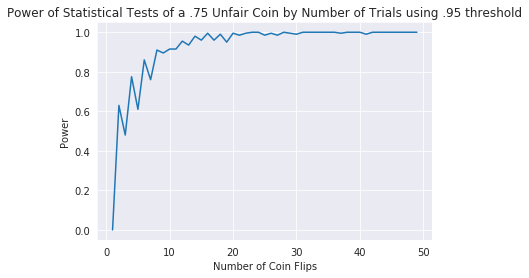

In [44]:
#What does the power increase as we increase sample size?
powers = []
cutoff = .95 #Set the p-value threshold for rejecting the null hypothesis
#Iterate through various sample sizes
unfair_coin_prob = .75
for n in range(1,50):
    #Do multiple runs for that number of samples to compare
    p_val = []
    for i in range(200):
        n_heads = np.random.binomial(n, unfair_coin_prob)
        mu = n / 2
        sigma = np.sqrt(n*.5*(1-.5))
        #print(sigma)
        z = (n_heads - mu) / (sigma / np.sqrt(n))
        p_val.append(st.norm.cdf(np.abs(z)))
        print(n_heads, mu, z, np.abs(z), st.norm.cdf(np.abs(z)),st.norm.cdf(np.abs(z)) >= cutoff )
    cur_power = sum([1 if p >= cutoff else 0 for p in p_val])/200
    powers.append(cur_power)
plt.plot(list(range(1,50)), powers)
plt.title('Power of Statistical Tests of a .75 Unfair Coin by Number of Trials using .95 threshold')
plt.ylabel('Power')
plt.xlabel('Number of Coin Flips')
powers

As you can see, the statistical power of this test is wonderful once we take a sample of just 20 flips! You can also imagine how this power might change if we require a p-value of .99 to reject the null hypothesis:

1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.84134

4.0 0.9999683287581669
2.0 0.9772498680518208
2.0 0.9772498680518208
4.0 0.9999683287581669
2.0 0.9772498680518208
4.0 0.9999683287581669
2.0 0.9772498680518208
2.0 0.9772498680518208
2.0 0.9772498680518208
4.0 0.9999683287581669
2.0 0.9772498680518208
2.0 0.9772498680518208
2.0 0.9772498680518208
0.0 0.5
0.0 0.5
2.0 0.9772498680518208
2.0 0.9772498680518208
0.0 0.5
2.0 0.9772498680518208
2.0 0.9772498680518208
4.0 0.9999683287581669
4.0 0.9999683287581669
2.0 0.9772498680518208
0.0 0.5
0.0 0.5
2.0 0.9772498680518208
0.0 0.5
4.0 0.9999683287581669
0.0 0.5
4.0 0.9999683287581669
4.0 0.9999683287581669
0.0 0.5
0.0 0.5
2.0 0.9772498680518208
4.0 0.9999683287581669
4.0 0.9999683287581669
4.0 0.9999683287581669
2.0 0.9772498680518208
4.0 0.9999683287581669
2.0 0.9772498680518208
4.0 0.9999683287581669
0.0 0.5
2.0 0.9772498680518208
2.0 0.9772498680518208
4.0 0.9999683287581669
0.0 0.5
4.0 0.9999683287581669
0.0 0.5
4.0 0.9999683287581669
0.0 0.5
4.0 0.9999683287581669
2.0 0.9772498680518208

1.0 0.8413447460685429
7.0 0.9999999999987201
5.0 0.9999997133484281
3.0 0.9986501019683699
3.0 0.9986501019683699
1.0 0.8413447460685429
1.0 0.8413447460685429
5.0 0.9999997133484281
7.0 0.9999999999987201
3.0 0.9986501019683699
1.0 0.8413447460685429
3.0 0.9986501019683699
3.0 0.9986501019683699
5.0 0.9999997133484281
3.0 0.9986501019683699
3.0 0.9986501019683699
3.0 0.9986501019683699
1.0 0.8413447460685429
7.0 0.9999999999987201
5.0 0.9999997133484281
7.0 0.9999999999987201
1.0 0.8413447460685429
7.0 0.9999999999987201
3.0 0.9986501019683699
3.0 0.9986501019683699
7.0 0.9999999999987201
1.0 0.8413447460685429
5.0 0.9999997133484281
3.0 0.9986501019683699
3.0 0.9986501019683699
5.0 0.9999997133484281
5.0 0.9999997133484281
1.0 0.8413447460685429
1.0 0.8413447460685429
5.0 0.9999997133484281
5.0 0.9999997133484281
7.0 0.9999999999987201
3.0 0.9986501019683699
5.0 0.9999997133484281
7.0 0.9999999999987201
7.0 0.9999999999987201
1.0 0.8413447460685429
5.0 0.9999997133484281
7.0 0.99999

3.0 0.9986501019683699
11.0 1.0
7.0 0.9999999999987201
7.0 0.9999999999987201
5.0 0.9999997133484281
7.0 0.9999999999987201
7.0 0.9999999999987201
5.0 0.9999997133484281
5.0 0.9999997133484281
9.0 1.0
3.0 0.9986501019683699
7.0 0.9999999999987201
9.0 1.0
7.0 0.9999999999987201
7.0 0.9999999999987201
5.0 0.9999997133484281
9.0 1.0
5.0 0.9999997133484281
1.0 0.8413447460685429
9.0 1.0
1.0 0.8413447460685429
1.0 0.8413447460685429
7.0 0.9999999999987201
3.0 0.9986501019683699
5.0 0.9999997133484281
7.0 0.9999999999987201
9.0 1.0
7.0 0.9999999999987201
3.0 0.9986501019683699
7.0 0.9999999999987201
11.0 1.0
9.0 1.0
9.0 1.0
9.0 1.0
5.0 0.9999997133484281
11.0 1.0
5.0 0.9999997133484281
7.0 0.9999999999987201
7.0 0.9999999999987201
5.0 0.9999997133484281
1.0 0.8413447460685429
9.0 1.0
5.0 0.9999997133484281
5.0 0.9999997133484281
1.0 0.8413447460685429
7.0 0.9999999999987201
3.0 0.9986501019683699
7.0 0.9999999999987201
9.0 1.0
7.0 0.9999999999987201
11.0 1.0
7.0 0.9999999999987201
3.0 0.9986

8.0 0.9999999999999993
10.0 1.0
4.0 0.9999683287581669
2.0 0.9772498680518208
0.0 0.5
8.0 0.9999999999999993
8.0 0.9999999999999993
10.0 1.0
8.0 0.9999999999999993
10.0 1.0
6.0 0.9999999990134123
2.0 0.9772498680518208
12.0 1.0
6.0 0.9999999990134123
4.0 0.9999683287581669
0.0 0.5
10.0 1.0
10.0 1.0
8.0 0.9999999999999993
10.0 1.0
4.0 0.9999683287581669
8.0 0.9999999999999993
2.0 0.9772498680518208
0.0 0.5
8.0 0.9999999999999993
6.0 0.9999999990134123
6.0 0.9999999990134123
14.0 1.0
2.0 0.9772498680518208
6.0 0.9999999990134123
6.0 0.9999999990134123
8.0 0.9999999999999993
8.0 0.9999999999999993
10.0 1.0
12.0 1.0
8.0 0.9999999999999993
4.0 0.9999683287581669
8.0 0.9999999999999993
0.0 0.5
0.0 0.5
6.0 0.9999999990134123
6.0 0.9999999990134123
6.0 0.9999999990134123
8.0 0.9999999999999993
6.0 0.9999999990134123
12.0 1.0
2.0 0.9772498680518208
4.0 0.9999683287581669
6.0 0.9999999990134123
2.0 0.9772498680518208
6.0 0.9999999990134123
8.0 0.9999999999999993
6.0 0.9999999990134123
8.0 0.9999

9.0 1.0
7.0 0.9999999999987201
3.0 0.9986501019683699
9.0 1.0
9.0 1.0
11.0 1.0
9.0 1.0
3.0 0.9986501019683699
9.0 1.0
5.0 0.9999997133484281
9.0 1.0
11.0 1.0
13.0 1.0
5.0 0.9999997133484281
13.0 1.0
11.0 1.0
7.0 0.9999999999987201
9.0 1.0
13.0 1.0
11.0 1.0
11.0 1.0
11.0 1.0
9.0 1.0
7.0 0.9999999999987201
15.0 1.0
9.0 1.0
9.0 1.0
3.0 0.9986501019683699
3.0 0.9986501019683699
11.0 1.0
15.0 1.0
13.0 1.0
15.0 1.0
9.0 1.0
7.0 0.9999999999987201
7.0 0.9999999999987201
11.0 1.0
9.0 1.0
1.0 0.8413447460685429
3.0 0.9986501019683699
7.0 0.9999999999987201
11.0 1.0
5.0 0.9999997133484281
17.0 1.0
9.0 1.0
1.0 0.8413447460685429
9.0 1.0
9.0 1.0
13.0 1.0
13.0 1.0
7.0 0.9999999999987201
13.0 1.0
2.0 0.9772498680518208
6.0 0.9999999990134123
8.0 0.9999999999999993
8.0 0.9999999999999993
14.0 1.0
10.0 1.0
2.0 0.9772498680518208
10.0 1.0
8.0 0.9999999999999993
14.0 1.0
8.0 0.9999999999999993
2.0 0.9772498680518208
14.0 1.0
2.0 0.9772498680518208
8.0 0.9999999999999993
6.0 0.9999999990134123
8.0 0.99999

9.0 1.0
7.0 0.9999999999987201
3.0 0.9986501019683699
9.0 1.0
5.0 0.9999997133484281
7.0 0.9999999999987201
15.0 1.0
5.0 0.9999997133484281
15.0 1.0
3.0 0.9986501019683699
13.0 1.0
11.0 1.0
7.0 0.9999999999987201
13.0 1.0
13.0 1.0
17.0 1.0
11.0 1.0
7.0 0.9999999999987201
7.0 0.9999999999987201
7.0 0.9999999999987201
13.0 1.0
9.0 1.0
15.0 1.0
9.0 1.0
11.0 1.0
13.0 1.0
11.0 1.0
3.0 0.9986501019683699
15.0 1.0
17.0 1.0
7.0 0.9999999999987201
7.0 0.9999999999987201
11.0 1.0
13.0 1.0
11.0 1.0
7.0 0.9999999999987201
9.0 1.0
11.0 1.0
19.0 1.0
7.0 0.9999999999987201
15.0 1.0
13.0 1.0
11.0 1.0
11.0 1.0
11.0 1.0
11.0 1.0
7.0 0.9999999999987201
7.0 0.9999999999987201
7.0 0.9999999999987201
9.0 1.0
17.0 1.0
15.0 1.0
15.0 1.0
13.0 1.0
7.0 0.9999999999987201
9.0 1.0
9.0 1.0
5.0 0.9999997133484281
7.0 0.9999999999987201
11.0 1.0
9.0 1.0
9.0 1.0
9.0 1.0
7.0 0.9999999999987201
9.0 1.0
11.0 1.0
11.0 1.0
7.0 0.9999999999987201
13.0 1.0
3.0 0.9986501019683699
13.0 1.0
7.0 0.9999999999987201
5.0 0.99999971

12.0 1.0
16.0 1.0
8.0 0.9999999999999993
12.0 1.0
16.0 1.0
12.0 1.0
4.0 0.9999683287581669
14.0 1.0
16.0 1.0
10.0 1.0
6.0 0.9999999990134123
20.0 1.0
12.0 1.0
16.0 1.0
14.0 1.0
8.0 0.9999999999999993
24.0 1.0
16.0 1.0
14.0 1.0
16.0 1.0
14.0 1.0
14.0 1.0
8.0 0.9999999999999993
10.0 1.0
10.0 1.0
16.0 1.0
16.0 1.0
8.0 0.9999999999999993
10.0 1.0
20.0 1.0
20.0 1.0
6.0 0.9999999990134123
12.0 1.0
10.0 1.0
14.0 1.0
16.0 1.0
6.0 0.9999999990134123
18.0 1.0
18.0 1.0
10.0 1.0
12.0 1.0
16.0 1.0
14.0 1.0
12.0 1.0
16.0 1.0
18.0 1.0
12.0 1.0
6.0 0.9999999990134123
0.0 0.5
6.0 0.9999999990134123
12.0 1.0
8.0 0.9999999999999993
6.0 0.9999999990134123
12.0 1.0
9.0 1.0
19.0 1.0
13.0 1.0
5.0 0.9999997133484281
11.0 1.0
19.0 1.0
13.0 1.0
5.0 0.9999997133484281
13.0 1.0
15.0 1.0
11.0 1.0
11.0 1.0
17.0 1.0
5.0 0.9999997133484281
5.0 0.9999997133484281
21.0 1.0
7.0 0.9999999999987201
1.0 0.8413447460685429
15.0 1.0
7.0 0.9999999999987201
15.0 1.0
9.0 1.0
13.0 1.0
17.0 1.0
9.0 1.0
3.0 0.9986501019683699
7.0 

9.0 1.0
11.0 1.0
9.0 1.0
15.0 1.0
13.0 1.0
11.0 1.0
17.0 1.0
9.0 1.0
9.0 1.0
11.0 1.0
21.0 1.0
21.0 1.0
13.0 1.0
13.0 1.0
15.0 1.0
21.0 1.0
11.0 1.0
9.0 1.0
13.0 1.0
15.0 1.0
19.0 1.0
13.0 1.0
17.0 1.0
15.0 1.0
25.0 1.0
15.0 1.0
11.0 1.0
7.0 0.9999999999987201
3.0 0.9986501019683699
5.0 0.9999997133484281
15.0 1.0
15.0 1.0
13.0 1.0
19.0 1.0
15.0 1.0
17.0 1.0
17.0 1.0
11.0 1.0
11.0 1.0
17.0 1.0
19.0 1.0
17.0 1.0
17.0 1.0
11.0 1.0
17.0 1.0
15.0 1.0
15.0 1.0
11.0 1.0
9.0 1.0
15.0 1.0
13.0 1.0
25.0 1.0
11.0 1.0
9.0 1.0
15.0 1.0
5.0 0.9999997133484281
11.0 1.0
19.0 1.0
19.0 1.0
7.0 0.9999999999987201
9.0 1.0
13.0 1.0
21.0 1.0
17.0 1.0
21.0 1.0
9.0 1.0
9.0 1.0
19.0 1.0
17.0 1.0
7.0 0.9999999999987201
11.0 1.0
6.0 0.9999999990134123
20.0 1.0
16.0 1.0
10.0 1.0
16.0 1.0
20.0 1.0
12.0 1.0
18.0 1.0
22.0 1.0
18.0 1.0
12.0 1.0
24.0 1.0
12.0 1.0
16.0 1.0
22.0 1.0
16.0 1.0
16.0 1.0
8.0 0.9999999999999993
14.0 1.0
20.0 1.0
24.0 1.0
12.0 1.0
12.0 1.0
16.0 1.0
14.0 1.0
14.0 1.0
14.0 1.0
12.0 1.0
20.0 1.

20.0 1.0
16.0 1.0
24.0 1.0
22.0 1.0
18.0 1.0
12.0 1.0
8.0 0.9999999999999993
22.0 1.0
12.0 1.0
24.0 1.0
10.0 1.0
12.0 1.0
16.0 1.0
22.0 1.0
16.0 1.0
18.0 1.0
16.0 1.0
22.0 1.0
18.0 1.0
14.0 1.0
12.0 1.0
18.0 1.0
14.0 1.0
16.0 1.0
22.0 1.0
20.0 1.0
20.0 1.0
20.0 1.0
18.0 1.0
20.0 1.0
22.0 1.0
24.0 1.0
14.0 1.0
26.0 1.0
16.0 1.0
18.0 1.0
6.0 0.9999999990134123
26.0 1.0
16.0 1.0
16.0 1.0
28.0 1.0
8.0 0.9999999999999993
16.0 1.0
14.0 1.0
14.0 1.0
12.0 1.0
22.0 1.0
10.0 1.0
14.0 1.0
22.0 1.0
18.0 1.0
22.0 1.0
16.0 1.0
10.0 1.0
16.0 1.0
8.0 0.9999999999999993
20.0 1.0
14.0 1.0
16.0 1.0
14.0 1.0
24.0 1.0
12.0 1.0
18.0 1.0
12.0 1.0
14.0 1.0
16.0 1.0
16.0 1.0
24.0 1.0
14.0 1.0
18.0 1.0
18.0 1.0
22.0 1.0
20.0 1.0
16.0 1.0
16.0 1.0
22.0 1.0
16.0 1.0
18.0 1.0
18.0 1.0
16.0 1.0
26.0 1.0
12.0 1.0
22.0 1.0
14.0 1.0
22.0 1.0
20.0 1.0
12.0 1.0
18.0 1.0
18.0 1.0
20.0 1.0
17.0 1.0
21.0 1.0
17.0 1.0
19.0 1.0
21.0 1.0
21.0 1.0
15.0 1.0
19.0 1.0
21.0 1.0
23.0 1.0
17.0 1.0
17.0 1.0
17.0 1.0
15.0 1.0
9.0 1.0


21.0 1.0
21.0 1.0
19.0 1.0
29.0 1.0
19.0 1.0
17.0 1.0
19.0 1.0
13.0 1.0
21.0 1.0
23.0 1.0
17.0 1.0
19.0 1.0
23.0 1.0
17.0 1.0
25.0 1.0
21.0 1.0
27.0 1.0
18.0 1.0
24.0 1.0
20.0 1.0
12.0 1.0
30.0 1.0
24.0 1.0
24.0 1.0
22.0 1.0
22.0 1.0
20.0 1.0
18.0 1.0
10.0 1.0
20.0 1.0
18.0 1.0
20.0 1.0
18.0 1.0
20.0 1.0
22.0 1.0
14.0 1.0
24.0 1.0
20.0 1.0
16.0 1.0
22.0 1.0
8.0 0.9999999999999993
20.0 1.0
24.0 1.0
16.0 1.0
20.0 1.0
16.0 1.0
24.0 1.0
18.0 1.0
28.0 1.0
22.0 1.0
22.0 1.0
20.0 1.0
22.0 1.0
16.0 1.0
14.0 1.0
20.0 1.0
22.0 1.0
26.0 1.0
22.0 1.0
28.0 1.0
22.0 1.0
22.0 1.0
30.0 1.0
12.0 1.0
24.0 1.0
24.0 1.0
16.0 1.0
30.0 1.0
20.0 1.0
22.0 1.0
16.0 1.0
18.0 1.0
28.0 1.0
28.0 1.0
26.0 1.0
16.0 1.0
20.0 1.0
22.0 1.0
18.0 1.0
8.0 0.9999999999999993
26.0 1.0
22.0 1.0
16.0 1.0
22.0 1.0
12.0 1.0
18.0 1.0
8.0 0.9999999999999993
26.0 1.0
16.0 1.0
30.0 1.0
24.0 1.0
16.0 1.0
26.0 1.0
14.0 1.0
18.0 1.0
26.0 1.0
14.0 1.0
26.0 1.0
18.0 1.0
10.0 1.0
12.0 1.0
26.0 1.0
32.0 1.0
24.0 1.0
20.0 1.0
22.0 1.0
18.0

23.0 1.0
35.0 1.0
23.0 1.0
19.0 1.0
15.0 1.0
17.0 1.0
25.0 1.0
23.0 1.0
37.0 1.0
25.0 1.0
29.0 1.0
27.0 1.0
23.0 1.0
13.0 1.0
29.0 1.0
23.0 1.0
23.0 1.0
21.0 1.0
23.0 1.0
33.0 1.0
19.0 1.0
19.0 1.0
19.0 1.0
21.0 1.0
23.0 1.0
29.0 1.0
27.0 1.0
21.0 1.0
25.0 1.0
23.0 1.0
15.0 1.0
23.0 1.0
21.0 1.0
13.0 1.0
23.0 1.0
19.0 1.0
17.0 1.0
21.0 1.0
21.0 1.0
21.0 1.0
5.0 0.9999997133484281
29.0 1.0
23.0 1.0
23.0 1.0
25.0 1.0
23.0 1.0
19.0 1.0
29.0 1.0
19.0 1.0
27.0 1.0
17.0 1.0
33.0 1.0
19.0 1.0
31.0 1.0
19.0 1.0
19.0 1.0
25.0 1.0
31.0 1.0
13.0 1.0
31.0 1.0
29.0 1.0
21.0 1.0
19.0 1.0
25.0 1.0
25.0 1.0
21.0 1.0
25.0 1.0
33.0 1.0
27.0 1.0
15.0 1.0
31.0 1.0
21.0 1.0
15.0 1.0
29.0 1.0
29.0 1.0
17.0 1.0
27.0 1.0
19.0 1.0
19.0 1.0
23.0 1.0
23.0 1.0
17.0 1.0
29.0 1.0
27.0 1.0
27.0 1.0
9.0 1.0
21.0 1.0
29.0 1.0
25.0 1.0
23.0 1.0
13.0 1.0
13.0 1.0
33.0 1.0
25.0 1.0
25.0 1.0
35.0 1.0
13.0 1.0
29.0 1.0
21.0 1.0
23.0 1.0
25.0 1.0
29.0 1.0
31.0 1.0
23.0 1.0
19.0 1.0
25.0 1.0
19.0 1.0
15.0 1.0
23.0 1.0
23.0 1

Text(0.5, 0, 'Number of Coin Flips')

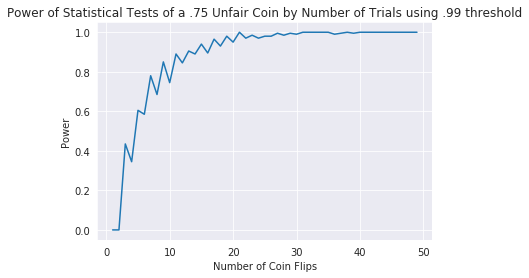

In [36]:
#What does the power increase as we increase sample size?
powers = []
cutoff = .99 #Set the p-value threshold for rejecting the null hypothesis
#Iterate through various sample sizes
unfair_coin_prob = .75
for n in range(1,50):
    #Do multiple runs for that number of samples to compare
    p_val = []
    for i in range(200):
        n_heads = np.random.binomial(n, unfair_coin_prob) # number of heads out of (n = # of flips)
        mu = n / 2
        sigma = np.sqrt(n*.5*(1-.5)) # binomial variance = n * p * ( 1 - p)
        z  = (n_heads - mu) / (sigma / np.sqrt(n)) 
        p_val.append(st.norm.cdf(np.abs(z)))
        print(np.abs(z), st.norm.cdf(np.abs(z)))

    cur_power = sum([1 if p >= cutoff else 0 for p in p_val])/200
    powers.append(cur_power)
plt.plot(list(range(1,50)), powers)
plt.title('Power of Statistical Tests of a .75 Unfair Coin by Number of Trials using .99 threshold')
plt.ylabel('Power')
plt.xlabel('Number of Coin Flips')

or if we are trying to detect a only slightly unfair coin:

Text(0.5,0,'Number of Coin Flips')

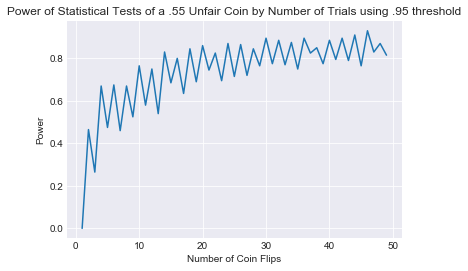

In [4]:
#What does the power increase as we increase sample size?
powers = []
cutoff = .95 #Set the p-value threshold for rejecting the null hypothesis
#Iterate through various sample sizes
unfair_coin_prob = .55
for n in range(1,50):
    #Do multiple runs for that number of samples to compare
    p_val = []
    for i in range(200):
        n_heads = np.random.binomial(n, unfair_coin_prob)
        mu = n / 2
        sigma = np.sqrt(n*.5*(1-.5))
        z  = (n_heads - mu) / (sigma / np.sqrt(n))
        p_val.append(st.norm.cdf(np.abs(z)))
    cur_power = sum([1 if p >= cutoff else 0 for p in p_val])/200
    powers.append(cur_power)
plt.plot(list(range(1,50)), powers)
plt.title('Power of Statistical Tests of a .55 Unfair Coin by Number of Trials using .95 threshold')
plt.ylabel('Power')
plt.xlabel('Number of Coin Flips')

In [30]:
n = 100
binomial = np.random.binomial(n, unfair_coin_prob)
binomial

70

## Summary

In this lesson, we discussed the idea of "statistical power" and how sample size, p_value and effect size impact the power of an experiment. Remember, the power of a statistical test is the probability of rejecting the null hypothesis when it is indeed false.